In [42]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re
import os

In [24]:
!pip install tweepy

In [25]:
import tweepy

In [26]:
import json
key_file = 'keys.json'
with open(key_file) as f:
    keys = json.load(f)

In [27]:
import tweepy
from tweepy import TweepError
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Your username is:", api.auth.get_username())
except TweepError as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

In [28]:
from pprint import pprint

In [29]:
def load_keys(path):
    key_file = path
    with open(key_file) as f:
        keys = json.load(f)
    return keys

In [30]:
def download_recent_tweets_by_user(user_account_name, keys):
    import tweepy
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)

    example_tweets = list(tweepy.Cursor(api.user_timeline, id=user_account_name).items())
    return example_tweets

In [31]:
def save_tweets(tweets, path):
    with open(path, "wb") as f:
        import pickle
        pickle.dump(tweets, f)

In [32]:
def load_tweets(path):
    with open(path, "rb") as f:
        import pickle
        tweets = pickle.load(f)
        return tweets

In [44]:
# Get recent tweets from one user, loading from a disk cache if available.
#  The first time you call this function, it will download tweets by a user.
# Subsequent calls will not re-download the tweets

def get_tweets_with_cache(user_account_name, keys_path):
    keys = load_keys(keys_path)
    
    saved_path = "realdonaldtrump_recent_tweets.pkl"
    if not os.path.isfile(saved_path):
        recent_tweets = download_recent_tweets_by_user(user_account_name, keys)
        save_tweets(recent_tweets, saved_path)
        
    loaded_tweets = load_tweets(saved_path)
    return loaded_tweets

In [45]:
# Run this cell to load @realdonaldtrump's tweets.
trump_tweets = get_tweets_with_cache("realdonaldtrump", key_file)
print("Number of tweets downloaded:", len(trump_tweets))

Number of tweets downloaded: 3230


In [46]:
type(trump_tweets[0])

tweepy.models.Status

In [47]:
trump_tweets[0].text

'I will be landing in Las Vegas shortly to pay my respects with @FLOTUS Melania. Everyone remains in our thoughts and prayers.'

In [48]:
time = [trump_tweets[x].created_at for x in np.arange(len(trump_tweets))]
source = [trump_tweets[x].source for x in np.arange(len(trump_tweets))]
text = [trump_tweets[x].text for x in np.arange(len(trump_tweets))]
retweet_count = [trump_tweets[x].retweet_count for x in np.arange(len(trump_tweets))]
ids = [trump_tweets[x].id_str for x in np.arange(len(trump_tweets))]

trump = pd.DataFrame()
trump['time'] = time
trump['source'] = source
trump['text'] = text
trump['retweet_count'] = retweet_count
trump.index = ids
trump.head()

,time,source,text,retweet_count
915604746936967168,2017-10-04 15:49:17,Twitter for iPhone,I will be landing in Las Vegas shortly to pay ...,8142
915596990674849792,2017-10-04 15:18:28,Twitter for iPhone,The @NBCNews story has just been totally refut...,10146
915589297096536065,2017-10-04 14:47:53,Twitter for iPhone,NBC news is #FakeNews and more dishonest than ...,12639
915539424406114304,2017-10-04 11:29:43,Twitter for iPhone,"Wow, so many Fake News stories today. No matte...",26963
915523382686478337,2017-10-04 10:25:58,Twitter for iPhone,A great day in Puerto Rico yesterday. While so...,11060


In [49]:
from datetime import datetime

ELEC_DATE = datetime(2016, 11, 8)
INAUG_DATE = datetime(2017, 1, 20)

In [50]:
trump.iloc[[0, -1], :]

,time,source,text,retweet_count
915604746936967168,2017-10-04 15:49:17,Twitter for iPhone,I will be landing in Las Vegas shortly to pay ...,8142
760594155835887616,2016-08-02 21:52:32,Twitter for iPhone,My daughter @IvankaTrump will be on @Greta ton...,5972


### Trump's tweets broken down by the type of device ###

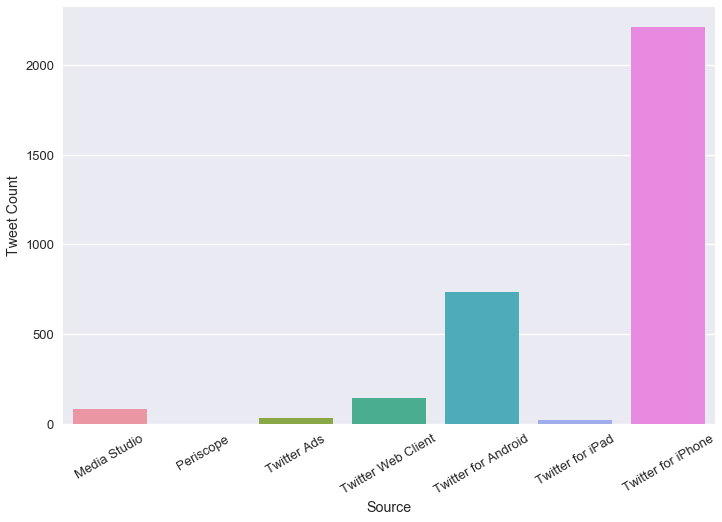

In [53]:
num_sources = len(trump['source'].unique())

# bar plot for the the count of tweets by device type
unique_counts = trump.groupby('source').count()
unique_sources = unique_counts.index
unique_source_count = unique_counts.time
bplot = sns.barplot(unique_sources, unique_source_count)
plt.xticks(rotation=30)
bplot.set_xlabel('Source')
bplot.set_ylabel('Tweet Count')

In [55]:
trump['est_time'] = pd.Index(trump['time']).tz_localize("UTC").tz_convert("US/Eastern")
trump.head()

,time,source,text,retweet_count,est_time
915604746936967168,2017-10-04 15:49:17,Twitter for iPhone,I will be landing in Las Vegas shortly to pay ...,8142,2017-10-04 11:49:17-04:00
915596990674849792,2017-10-04 15:18:28,Twitter for iPhone,The @NBCNews story has just been totally refut...,10146,2017-10-04 11:18:28-04:00
915589297096536065,2017-10-04 14:47:53,Twitter for iPhone,NBC news is #FakeNews and more dishonest than ...,12639,2017-10-04 10:47:53-04:00
915539424406114304,2017-10-04 11:29:43,Twitter for iPhone,"Wow, so many Fake News stories today. No matte...",26963,2017-10-04 07:29:43-04:00
915523382686478337,2017-10-04 10:25:58,Twitter for iPhone,A great day in Puerto Rico yesterday. While so...,11060,2017-10-04 06:25:58-04:00


In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
trump['hour'] = trump['est_time'].dt.hour

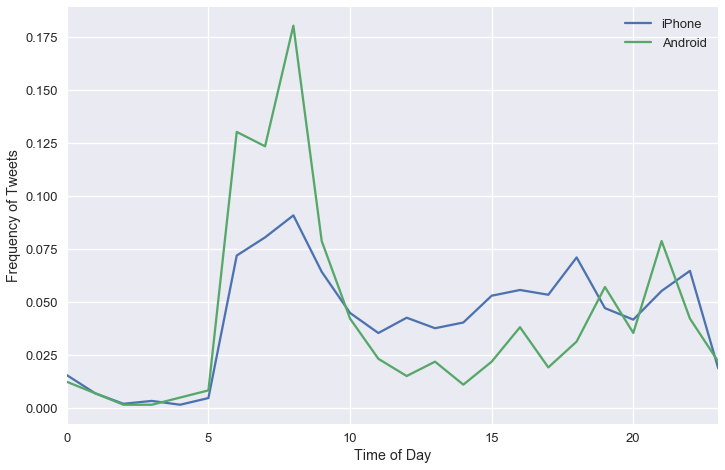

In [59]:
# frequency of tweets by device and time of day

iphoneTweets = trump[trump['source'] == 'Twitter for iPhone']
iphoneHourFreq = iphoneTweets.hour.value_counts(normalize = True)

androidTweets = trump[trump['source'] == 'Twitter for Android']
androidHourFreq = androidTweets['hour'].value_counts(normalize = True)

iphoneHourFreq.sort_index().plot(kind='line')
androidHourFreq.sort_index().plot(kind='line')

plt.legend(["iPhone", "Android"])
plt.xlabel('Time of Day')
plt.ylabel('Frequency of Tweets')

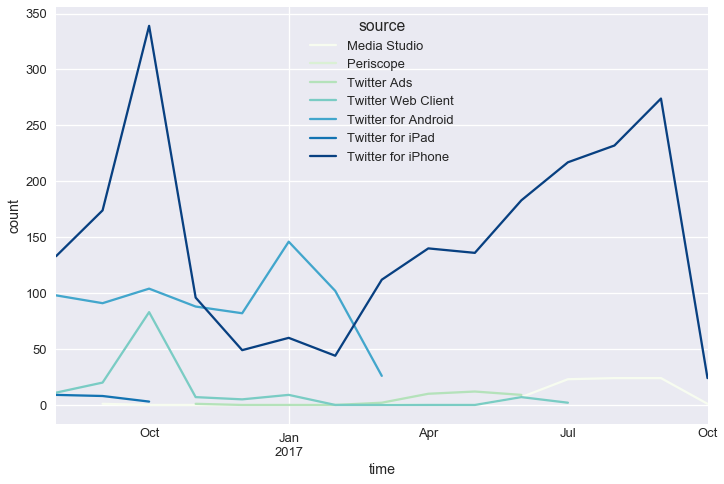

In [62]:
# count of tweets over time by organized by device

(trump.loc[:, ['est_time', 'source']]
 .set_index('est_time')
 .groupby('source')
 .resample('M')
 .size()
 .unstack(level=0)
 .plot(colormap='GnBu')
)
plt.xlabel('time')
plt.ylabel('count')

### Sentiment Analysis of Trump's Tweets ###

In [88]:
# upload lexicon polariites into a dataframe
# Larger numbers indicate a positive sentiment while smaller and negative numbers indicated a negative sentiment

lex = pd.read_table('./vader_lexicon.txt', sep='\t', index_col=0, usecols=[0,1], names=['word', 'polarity'])

In [69]:
trump['text'] = [t.lower() for t in trump['text']]

In [70]:
punct_re = r'[^\w+\s+]'
trump['no_punc'] = [re.sub(punct_re, " ", text) for text in trump['text']]

In [71]:
tidy_format = pd.DataFrame(trump['no_punc'].str.split(r'\s+', expand = True).stack(level=0).reset_index()).set_index(['level_0'])
tidy_format.columns =['num', 'word']
del tidy_format.index.name


In [89]:
# aggregate the sentiment polarities for each tweet by adding up the sentiment for each word

polarities = tidy_format.join(lex, 'word').fillna(0).reset_index().groupby('index').aggregate('sum').drop('num', axis=1)

In [90]:
senti = trump.join(polarities)
senti.head()

,time,source,text,retweet_count,est_time,hour,no_punc,polarity
915604746936967168,2017-10-04 15:49:17,Twitter for iPhone,i will be landing in las vegas shortly to pay ...,8142,2017-10-04 11:49:17-04:00,11,i will be landing in las vegas shortly to pay ...,0.9
915596990674849792,2017-10-04 15:18:28,Twitter for iPhone,the @nbcnews story has just been totally refut...,10146,2017-10-04 11:18:28-04:00,11,the nbcnews story has just been totally refut...,0.2
915589297096536065,2017-10-04 14:47:53,Twitter for iPhone,nbc news is #fakenews and more dishonest than ...,12639,2017-10-04 10:47:53-04:00,10,nbc news is fakenews and more dishonest than ...,-4.2
915539424406114304,2017-10-04 11:29:43,Twitter for iPhone,"wow, so many fake news stories today. no matte...",26963,2017-10-04 07:29:43-04:00,7,wow so many fake news stories today no matte...,-1.2
915523382686478337,2017-10-04 10:25:58,Twitter for iPhone,a great day in puerto rico yesterday. while so...,11060,2017-10-04 06:25:58-04:00,6,a great day in puerto rico yesterday while so...,8.0


In [74]:
print('Most negative tweets:')
for t in senti.sort_values('polarity').head()['text']:
    print('  ', t)

Most negative tweets:
   democrat jon ossoff would be a disaster in congress. very weak on crime and illegal immigration, bad for jobs and wants higher taxes. say no
   "@fiiibuster: @jeffzeleny pathetic - you have no sufficient evidence that donald trump did not suffer from voter fraud, shame! bad reporter.
   rt @seanspicer: .@timkaine wants to tough on crime - fails to talk about defending rapists and murders #vpdebate
   the fake news media has never been so wrong or so dirty. purposely incorrect stories and phony sources to meet their agenda of hate. sad!
   the failing new york times foiled u.s. attempt to kill the single most wanted terrorist,al-baghdadi.their sick agenda over national security


In [75]:
print('Most positive tweets:')
for t in senti.sort_values('polarity', ascending=False).head()['text']:
    print('  ', t)

Most positive tweets:
   thank you to linda bean of l.l.bean for your great support and courage. people will support you even more now. buy l.l.bean. @lbperfectmaine
   rt @ivankatrump: 2016 has been one of the most eventful and exciting years of my life. i wish you peace, joy, love and laughter. happy new…
   "@pauladuvall2: we're all enjoying you, as well, mr. t.! you've inspired hope and a positive spirit throughout america! god bless you!" nice
   great honor to be endorsed by popular &amp; successful @gov_gilmore of va. a state that i very much want to win-thx jim! https://t.co/x4y1tafhvn
   hope you like my nomination of judge neil gorsuch for the united states supreme court. he is a good and brilliant man, respected by all.


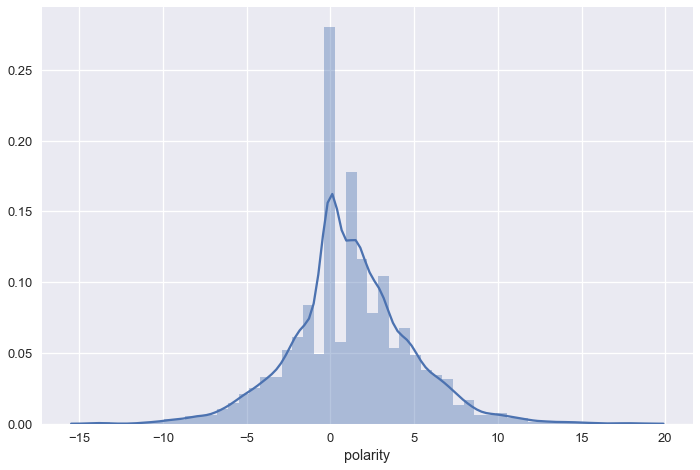

In [77]:
# distribution of the sentiments of Trump's tweets

sns.distplot(senti['polarity'])

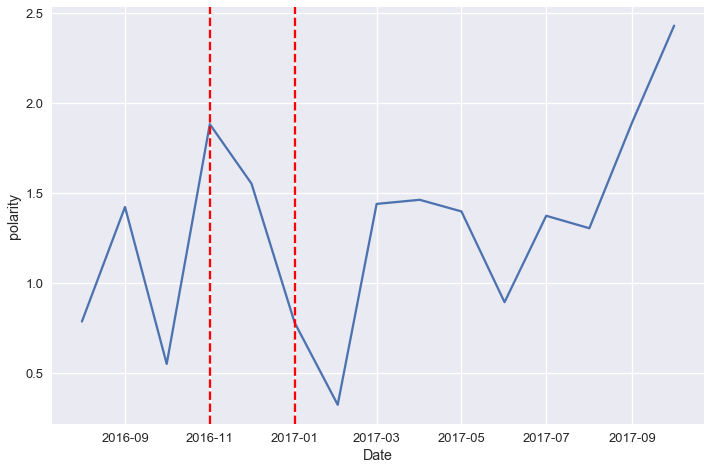

In [94]:
# the sentimental polarity of Trump's tweets over time

senti['est_time'] = pd.to_datetime(senti['est_time'])
senti['time'] = pd.to_datetime(senti['est_time'])
senti['time'] = senti['est_time'].apply(lambda x: x.strftime('%B-%Y'))
senti['time'] = pd.to_datetime(senti['time'], format='%B-%Y')
senti_timer = senti.groupby('time').aggregate('mean')

plt.plot(senti_timer.index, senti_timer['polarity'])
plt.xlabel('Date')
plt.ylabel('polarity')

plt.axvline(x='November-2016', color='r').set_linestyle('--')
plt.axvline(x='January-2017', color='r').set_linestyle('--')

In [79]:
# get the tweets that contain hashtags or links but are not retweets

rt_re = r'(^|[^aA-zZ0-9])rt($|[^aA-zZ0-9])'
hash_re = r'(http|#[aA-zZ]+)'
hlmask = senti.text.str.contains(hash_re)
hl = senti[hlmask]
noRTmask = ~hl.text.str.contains(rt_re)
hash_or_link = hl[noRTmask]
hash_or_link.head()

,time,source,text,retweet_count,est_time,hour,no_punc,polarity
915596990674849792,2017-10-01,Twitter for iPhone,the @nbcnews story has just been totally refut...,10146,2017-10-04 11:18:28-04:00,11,the nbcnews story has just been totally refut...,0.2
915589297096536065,2017-10-01,Twitter for iPhone,nbc news is #fakenews and more dishonest than ...,12639,2017-10-04 10:47:53-04:00,10,nbc news is fakenews and more dishonest than ...,-4.2
915379231454003200,2017-10-01,Twitter for iPhone,my administration will continue to work around...,11484,2017-10-03 20:53:10-04:00,20,my administration will continue to work around...,4.9
915351470354108417,2017-10-01,Twitter for iPhone,"so proud of @fema, military, and first respond...",10602,2017-10-03 19:02:51-04:00,19,so proud of fema military and first respond...,3.6
915335645719121920,2017-10-01,Twitter for iPhone,great meeting with governor mapp of the #usvi....,6604,2017-10-03 17:59:58-04:00,17,great meeting with governor mapp of the usvi ...,8.9


In [80]:
len(hash_or_link)

1306

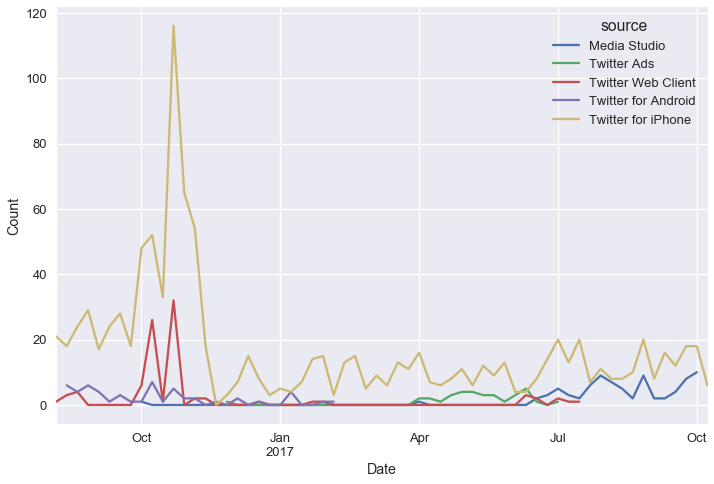

In [83]:
# plot the hastagged or linked tweets over time by device

sourceCount = pd.DataFrame(hash_or_link.loc[:, ['est_time', 'source']].set_index('est_time')).groupby('source').resample('W').size().reset_index().pivot('est_time', 'source')
sourceCount=sourceCount[0]
sourceCount = sourceCount.drop(['Twitter for iPad', 'Periscope'], axis=1)
sourceCount.plot()
plt.xlabel('Date')
plt.ylabel('Count')

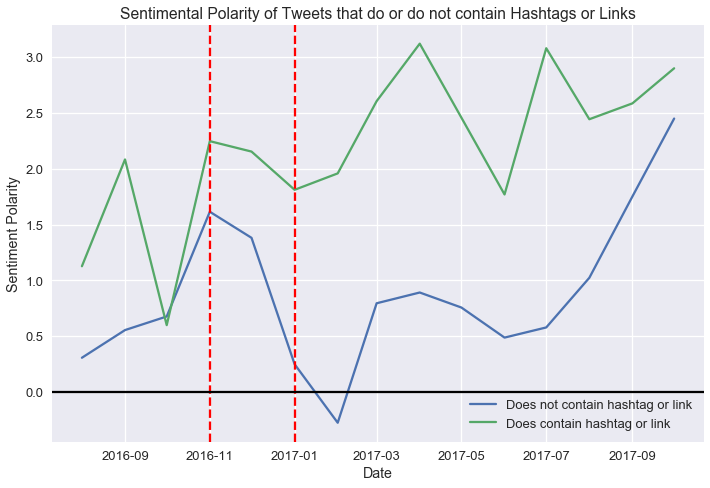

In [97]:
noRTuniversal = ~senti.text.str.contains(rt_re)
noRTdf = senti[noRTuniversal]
HLmask = noRTdf.text.str.contains(hash_re)
noHLmask = ~noRTdf.text.str.contains(hash_re)
hasHL = noRTdf[HLmask].groupby('time').agg('mean')
noHL = noRTdf[noHLmask].groupby('time').agg('mean')

plt.plot(noHL.index, noHL['polarity'])
plt.plot(hasHL.index, hasHL['polarity'])
plt.legend(['Does not contain hashtag or link', 'Does contain hashtag or link'])
plt.axvline(x='2016-11', color='r').set_linestyle('--')
plt.axvline(x='2017-01', color='r').set_linestyle('--')
plt.axhline(y=0, color='black')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.title('Sentimental Polarity of Tweets that do or do not contain Hashtags or Links')

## Fake News! ###

In [91]:
# words with the highest retweet count

word_count = tidy_format.groupby('word').count().sort_values(['num'], ascending=False).reset_index()
word_count = word_count[word_count['num'] >= 25]
words = tidy_format[tidy_format['word'].isin(word_count['word'])]
rtCountMedian = words.join(trump).groupby('word').agg('median').reset_index().sort_values('retweet_count', ascending=False).head(100)
top_20 = rtCountMedian[:20].drop(['hour', 'num'], axis=1).set_index('word')
top_20.head()

,retweet_count
word,
fake,22164.0
russia,21216.0
should,20859.0
korea,20797.0
news,20332.0


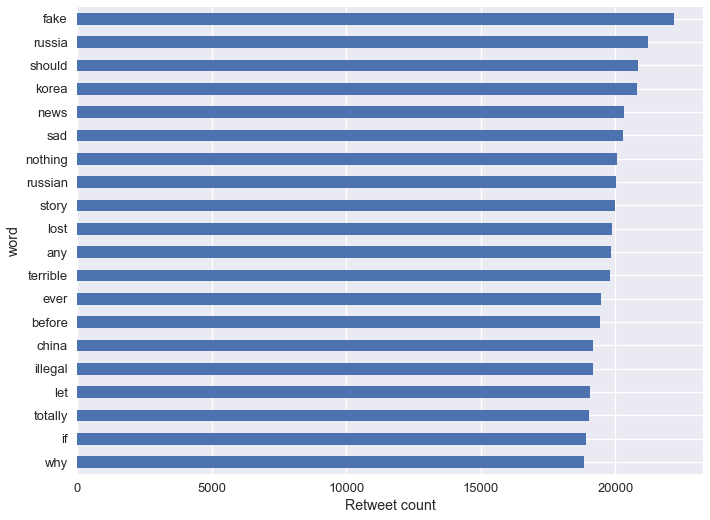

In [98]:
top_20['retweet_count'].sort_values().plot.barh(figsize=(10, 8))
plt.xlabel('Retweet count')

In [101]:
fn = []
for text in trump['text']:
    if 'fake news' in text:
        fn.append(1)
    else:
        fn.append(0)
        
totalTweets = np.repeat(1, len(senti))

tempDF = senti
tempDF['fake_news'] = fn
tempDF['total'] = totalTweets
    
fake_counts = tempDF.set_index('est_time').resample('2W').sum().loc[:, ['fake_news', 'total']]

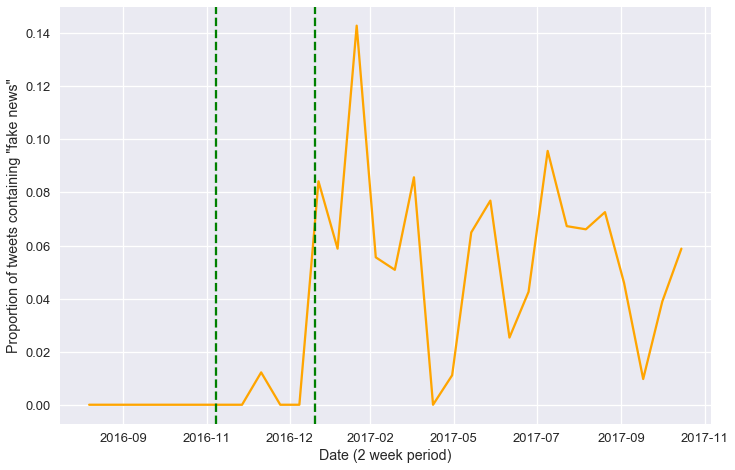

In [103]:
# proportion of tweets that contain 'fake news' for every two week period

fake_counts['proportion'] = fake_counts['fake_news'] / fake_counts['total']
plt.plot(fake_counts.index, fake_counts['proportion'], color="orange")
plt.axvline(x='2016-11-8', linestyle='--', color='g')
plt.axvline(x='2017-1-20', linestyle='--', color='g')
plt.xlabel('Date (2 week period)')
plt.ylabel('Proportion of tweets containing "fake news"')